In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/lankenau/isotools/src')

In [3]:
import os
import logging
from isotools import Transcriptome
from isotools import __version__ as isotools_version
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# set up logging
logging.basicConfig(format="%(levelname)s:%(message)s", level=logging.INFO)
logger = logging.getLogger("isotools")
logger.info(f"This is isotools version {isotools_version}")

INFO:This is isotools version 0.3.5rc11


In [4]:

basepath = '/project/hfa_work/ENCODE/code/snakemake-pipeline/'
version = 0
TISSUES = ["aorta", "brain", "colon", "heart", "lung", "muscle"]
path = os.path.join(basepath, "results/isotools_v{version}/pkl/{tissue}.pkl")
isoseqs = [Transcriptome.load(path.format(version=version, tissue=tissue)) for tissue in TISSUES]

INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/aorta.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/brain.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/colon.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/heart.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/lung.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/muscle.pkl


In [5]:
classification = os.path.join(basepath, 'results/sqanti/isotools_v{version}/qc/{tissue}/{tissue}_classification.txt')
for tissue, isoseq in zip(TISSUES, isoseqs):
    isoseq.import_sqanti_classification(classification.format(version=version, tissue=tissue))

100%|██████████| 29984/29984 [00:10<00:00, 2993.84it/s]


In [6]:
for isoseq in isoseqs:
    isoseq.add_filter(tag='SQANTI_SUPPORT', expression='CAGE_SUPPORT and TSS_RATIO and POLYA_SITE and POLYA_MOTIF', context='transcript', update=True)

In [7]:
for isoseq in isoseqs:
    count = 0
    for transcript in isoseq.iter_transcripts(query='SQANTI_SUPPORT'):
        count += 1
    count

In [9]:
coordination_results = [isoseq.coordination_test(
    event_type=["TSS", "PAS"],
    min_total=10,
    min_alt_fraction=.01,
    transcript_filter="SQANTI_SUPPORT",
) for isoseq in isoseqs]
coordination_results_sig = [c[c["padj"] < 0.05] for c in coordination_results]
coordination_results_sig[0]

,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,eventA_end,eventB_start,eventB_end,pvalue,...,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_transcript_ids,priA_altB_transcript_ids,altA_priB_transcript_ids,altA_altB_transcript_ids
0,ENSG00000084072.17,PPIE,+,TSS,PAS,39738885,39738885,39753697,39763909,6.973966e-15,...,-0.653543,-0.196850,19,25,83,0,"[3, 0]",[2],"[1, 4]",[]
11,ENSG00000109854.14,HTATIP2,+,TSS,PAS,20363753,20363753,20383775,20367650,1.398601e-03,...,0.457143,0.533333,8,1,0,6,[0],[1],[],[2]
12,ENSG00000109854.14,HTATIP2,+,TSS,PAS,20363753,20363753,20383775,20367650,2.124338e-09,...,-0.050847,-0.940678,1,111,6,0,[1],[3],[2],[]
15,ENSG00000111652.10,COPS7A,+,TSS,PAS,6724110,6724110,6731857,6731857,3.289635e-04,...,-0.142045,-0.144886,251,51,50,0,"[0, 3]","[2, 1]",[5],[]
16,ENSG00000111652.10,COPS7A,+,TSS,PAS,6724110,6724110,6731857,6731857,1.107824e-04,...,-0.139276,-0.161560,251,58,50,0,"[0, 3]","[4, 6]",[5],[]
19,ENSG00000140416.26,TPM1,+,TSS,PAS,63042748,63042748,63071910,63071910,8.584535e-04,...,-0.057309,-0.021927,5543,132,345,0,"[2, 1, 0, 6, 21, 20, 10, 24, 22, 18, 23, 16, 8...","[25, 12, 13]",[11],[]
32,ENSG00000160310.19,PRMT2,+,TSS,PAS,46635673,46635673,46664939,46660143,7.439764e-06,...,-0.304942,-0.034700,628,33,290,0,"[6, 3, 7, 1, 12, 13, 8, 11]",[14],"[2, 4, 10, 5]",[]
33,ENSG00000100060.18,MFNG,-,TSS,PAS,37485922,37485922,37469312,37469312,1.082045e-05,...,-0.016854,-0.971910,2,173,3,0,"[0, 4]","[2, 1]",[3],[]
40,ENSG00000204642.14,HLA-F,+,TSS,PAS,29723426,29723426,29726520,29727294,8.865248e-03,...,-0.895833,-0.041667,3,2,43,0,[0],[1],[2],[]
45,ENSG00000102103.18,PQBP1,+,TSS,PAS,48897928,48897928,48903131,48903139,7.207207e-03,...,0.081081,0.069157,3,0,5,29,[0],[],[3],[1]


In [10]:
coordination_results_unfiltered = [isoseq.coordination_test(
    event_type=["TSS", "PAS"],
) for isoseq in isoseqs]
coordination_results_unfiltered_sig = [c[c["padj"] < 0.05] for c in coordination_results_unfiltered]
coordination_results_unfiltered_sig[0]

,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,eventA_end,eventB_start,eventB_end,pvalue,...,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_transcript_ids,priA_altB_transcript_ids,altA_priB_transcript_ids,altA_altB_transcript_ids
2,ENSG00000116260.17,QSOX1,+,TSS,PAS,180154883,180194320,180198031,180198031,8.341316e-03,...,-0.318452,-0.065435,29,10,68,5,"[0, 30, 4]",[20],"[2, 1, 3, 27, 28, 29]","[19, 43, 42]"
3,ENSG00000153187.21,HNRNPU,-,TSS,PAS,244864483,244864483,244853860,244856158,2.409404e-03,...,-0.114613,-0.261317,87,55,23,2,"[2, 35, 39, 10, 43, 21, 23]","[3, 19, 18]","[25, 49]",[24]
8,ENSG00000162614.19,NEXN,+,TSS,PAS,77888621,77918215,77929404,77942120,4.498795e-04,...,0.164916,0.316639,64,30,7,18,"[4, 5, 14, 6, 13, 9, 24, 57]","[72, 73, 27]","[22, 55, 53, 54]","[70, 75, 71, 79, 81]"
10,ENSG00000162614.19,NEXN,+,TSS,PAS,77888621,77918215,77935947,77929404,1.835877e-02,...,-0.119767,-0.059883,13,17,64,30,"[10, 8, 1, 48]","[32, 28, 76]","[4, 5, 14, 6, 13, 9, 24, 57]","[72, 73, 27]"
11,ENSG00000162614.19,NEXN,+,TSS,PAS,77888621,77918215,77943224,77929404,4.126047e-03,...,-0.134184,-0.061382,6,13,64,30,"[11, 17, 0, 16]","[26, 31, 33, 77, 78]","[4, 5, 14, 6, 13, 9, 24, 57]","[72, 73, 27]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,ENSG00000137573.14,SULF1,+,TSS,PAS,69492846,69576017,69660909,69628193,1.865551e-06,...,-0.099608,-0.207516,20,112,34,38,"[2, 3, 7, 8, 12, 13]","[19, 24, 28, 114, 32, 105, 20, 23, 26, 27, 30]","[61, 56, 68, 85, 91]","[106, 115, 116]"
792,ENSG00000137076.22,TLN1,-,TSS,PAS,35708340,35732074,35697342,35707835,3.887311e-29,...,0.660377,0.660377,70,0,0,36,"[12, 97, 3, 101, 15, 112]",[],[],"[51, 72, 73, 50, 52, 54, 58]"
796,PB_novel_142969,PB_novel_142969,+,TSS,PAS,154359581,154357487,154361075,154361046,1.733040e-02,...,-0.032288,-0.023367,54,101,256,305,"[19, 596, 606]","[119, 195, 221, 450, 417, 446, 447, 455, 247, ...",[120],"[37, 169, 202, 206, 135, 205, 193, 436, 411, 4..."
804,ENSG00000147065.18,MSN,+,TSS,PAS,65667653,65731940,65741929,65718817,5.530009e-05,...,-0.311111,-0.177778,69,24,42,0,"[0, 1, 5, 6, 8]",[14],"[9, 7]",[]


([<matplotlib.axis.YTick at 0x7fd4db2c0d70>,
 [Text(0, 0.5, 'pri'), Text(0, 1.5, 'alt')])

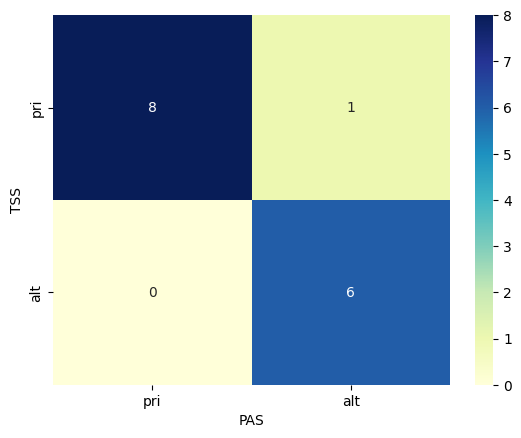

In [11]:
# Display a contingency table for a specific event
first_event = coordination_results_sig[0].iloc[1]
# priA_priB	priA_altB	altA_priB	altA_altB
con_tab = [[first_event["priA_priB"], first_event["priA_altB"]], [first_event["altA_priB"], first_event["altA_altB"]]]
sns.heatmap(con_tab, annot=True, fmt="d", cmap="YlGnBu")
# Axis labels
plt.ylabel("TSS")
plt.xlabel("PAS")
# ticks
plt.xticks([0.5, 1.5], ["pri", "alt"])
plt.yticks([0.5, 1.5], ["pri", "alt"])

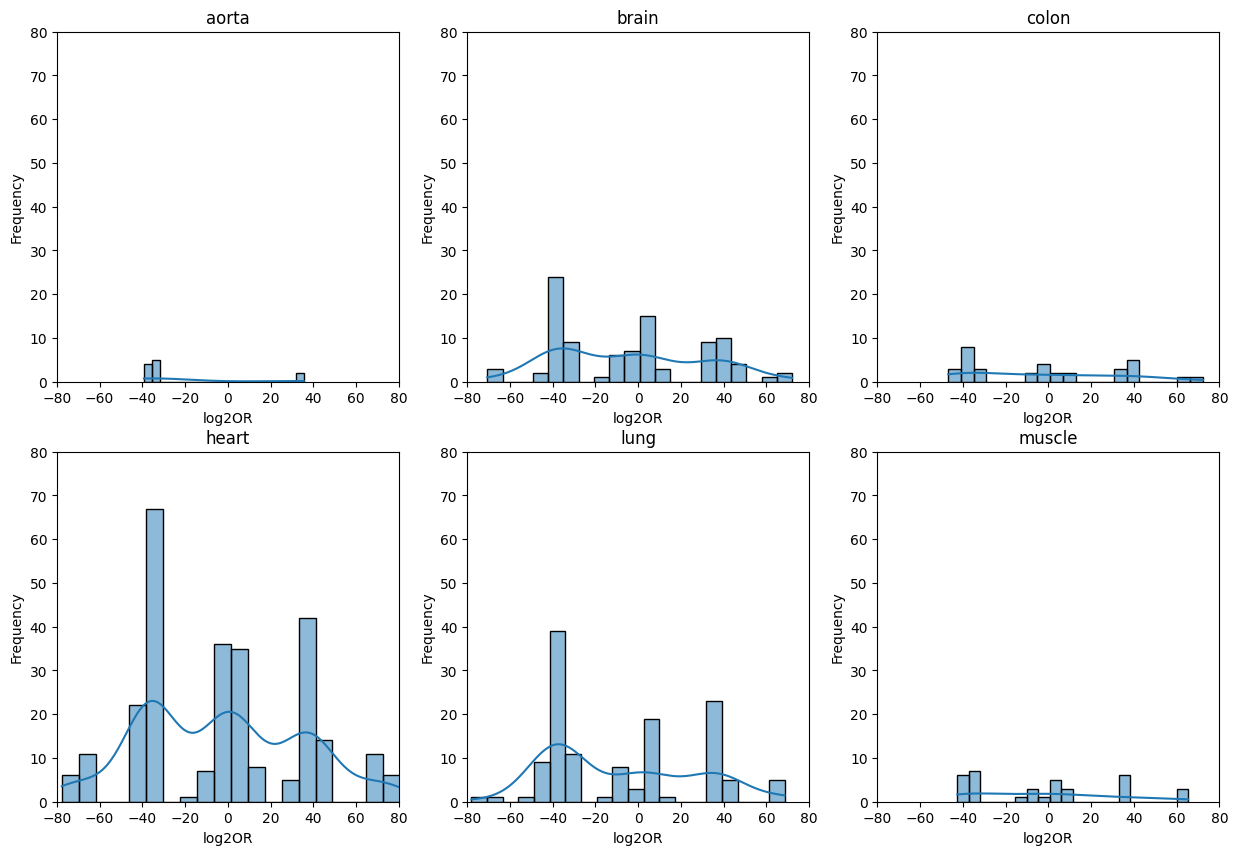

In [12]:
# 2x3 subplot grid of histograms
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    sns.histplot(coordination_results_sig[i]["log2OR"], bins=20, kde=True, ax=ax)
    # Limit x to -80 to 80
    ax.set_xlim(-80, 80)
    # Limit y to 0 to 80
    ax.set_ylim(0, 80)
    ax.set_xlabel("log2OR")
    ax.set_ylabel("Frequency")
    ax.set_title(TISSUES[i])

In [32]:
# Taken from Carmine with minor adjustments
# https://github.com/carmineceraolo/splicing-coordination/blob/main/sheet05.ipynb
def volcano_plot(df,ax = None,sig=0.05,sigor=1.5,tag="(add a tag)",normalized=False):
    if ax is None:
        fig,ax = plt.subplots(figsize=(10,5))

    palette=sns.color_palette().as_hex()
    colors=[]

    for i,r in df.iterrows():
        if r.padj>=sig or abs(r.log2OR)<=sigor:
            colors.append(palette[7])
        else:
            colors.append(palette[0])

    x=np.array(df.log2OR)

    if normalized:
        sigor-=np.mean(x)
        sigor/=np.std(x)
        x-=np.mean(x)
        x/=np.std(x)

        y=np.array(df.padj)

        sig-=np.mean(y)
        sig/=np.std(y)

        y-=np.mean(y)
        y/=np.std(y)
        y=-np.log10(y)
        title=f"Normalized volcano plot of {tag}"
    else:
        y=np.array(-np.log10(np.where(df.padj == 0, sys.float_info.min, df.padj)))
        title=f"Volcano plot of {tag}"

    ax.scatter(x,y,c=colors)
    ax.axhline(y=-np.log10(sig),color="red",linestyle='dotted',label=f"padj = {sig}")
    ax.axvline(x=sigor,color="green",linestyle='dotted',label=f"log2OR threshold = {sigor}")
    ax.axvline(x=-sigor,color="green",linestyle='dotted')

    ax.set_xlim(-80,80)

    ax.set_title(title,fontsize=13+7)
    ax.set_ylabel("-log10(p_value)",fontsize=12)
    ax.set_xlabel("log2OR",fontsize=12)
    # ax.legend(frameon=True,fontsize=12)

In [33]:
coordination_results[1].loc[coordination_results[1].padj == 0]

,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,eventA_end,eventB_start,eventB_end,pvalue,...,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_transcript_ids,priA_altB_transcript_ids,altA_priB_transcript_ids,altA_altB_transcript_ids
205,ENSG00000171867.18,PRNP,+,TSS,PAS,4686457,4686457,4701587,4701587,0.0,...,-0.379473,-0.618081,1,1074,659,1,[0],[1],[2],[3]


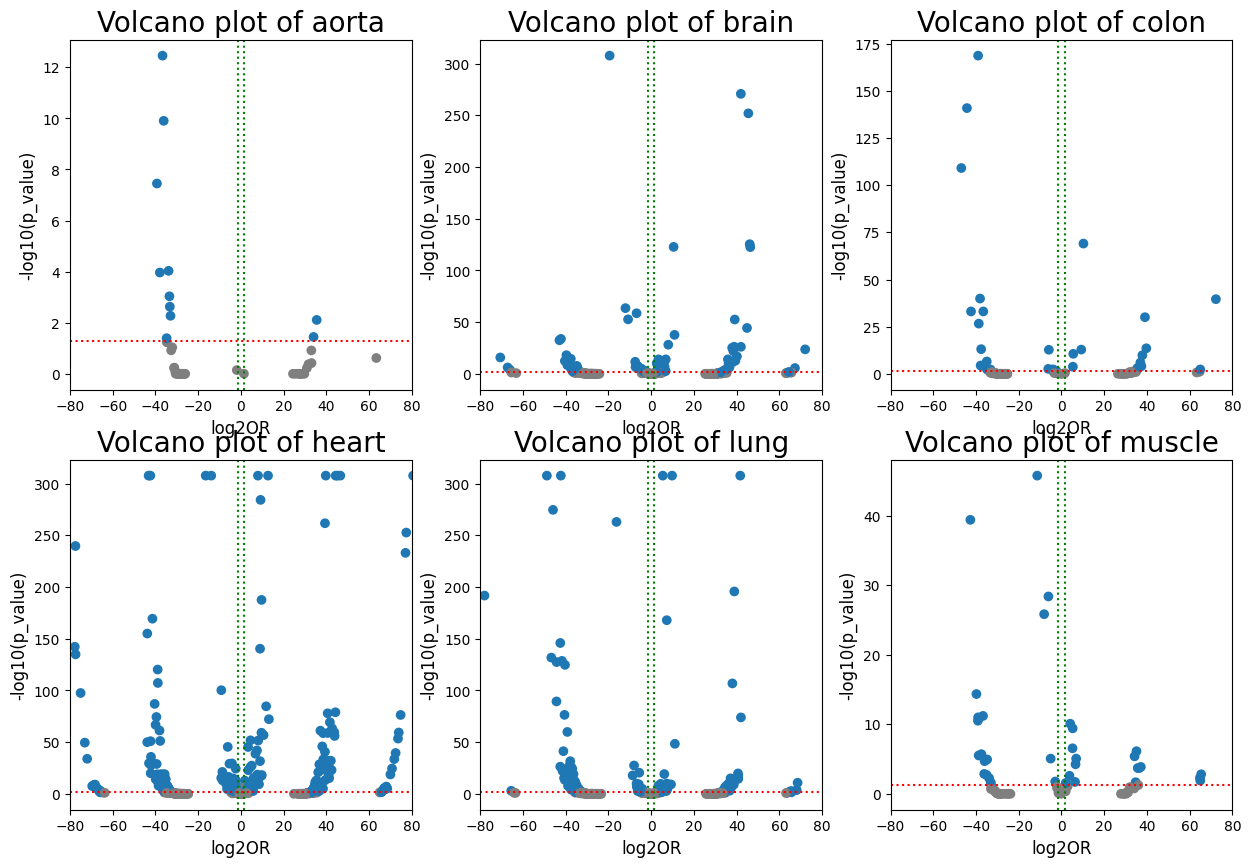

In [34]:
# 2x3 subplot grid of volcano plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    volcano_plot(coordination_results[i], ax=ax, tag=TISSUES[i])